In [2]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")

Тут получаем представление о данных

In [3]:
train=pd.read_csv("train_loan.csv") 
test=pd.read_csv("test_loan.csv")
train_original=train.copy() 
test_original=test.copy()

In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
train.shape

(614, 13)

Тут начинаем мутить графики. Называется univariate analysis. Типа используем только одну переменную

In [8]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

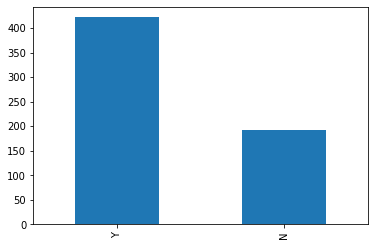

In [9]:
train['Loan_Status'].value_counts().plot.bar()

<bound method Axes.plot of <matplotlib.axes._subplots.AxesSubplot object at 0x00000240612BA208>>

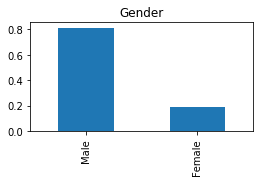

In [10]:
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(4,2), title= 'Gender').plot

<bound method Axes.plot of <matplotlib.axes._subplots.AxesSubplot object at 0x000002406130A808>>

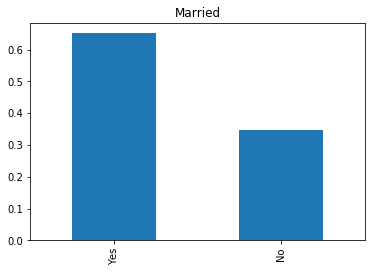

In [11]:
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married').plot

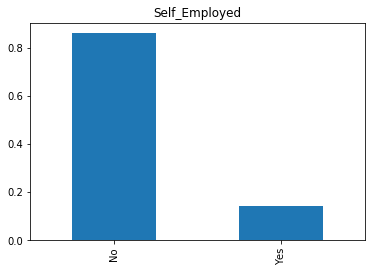

In [12]:
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 

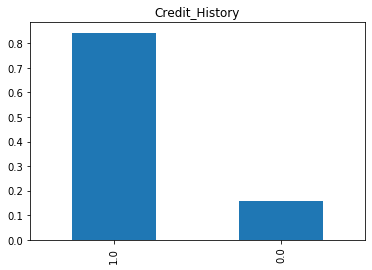

In [13]:
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 

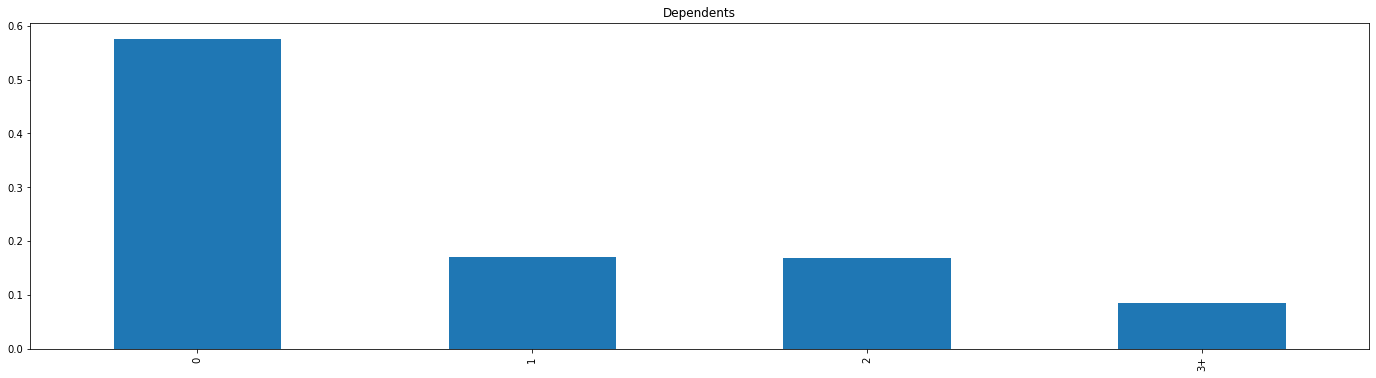

In [14]:
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents')

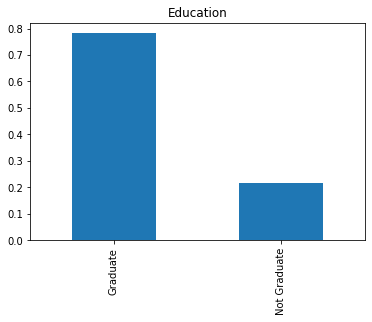

In [15]:
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

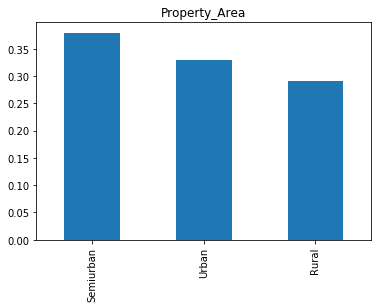

In [16]:
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 

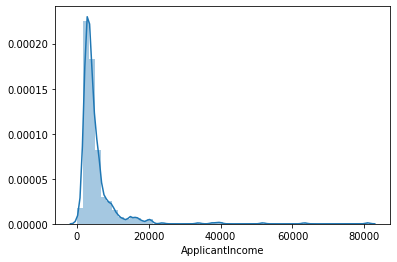

In [17]:
sns.distplot(train['ApplicantIncome'])

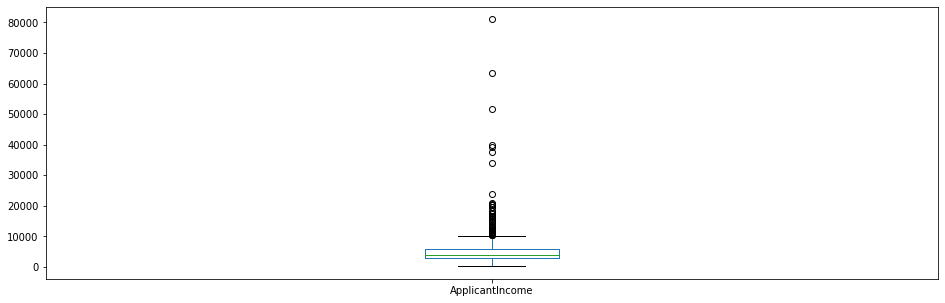

In [18]:
train['ApplicantIncome'].plot.box(figsize=(16,5))

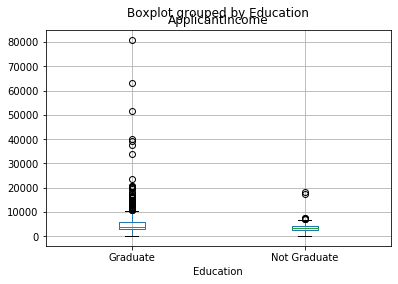

In [19]:
train.boxplot(column='ApplicantIncome', by = 'Education')

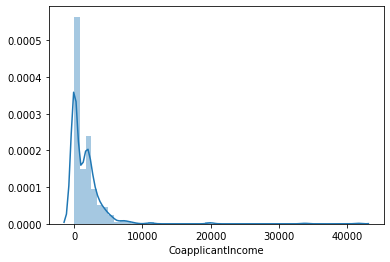

In [20]:
sns.distplot(train['CoapplicantIncome'])

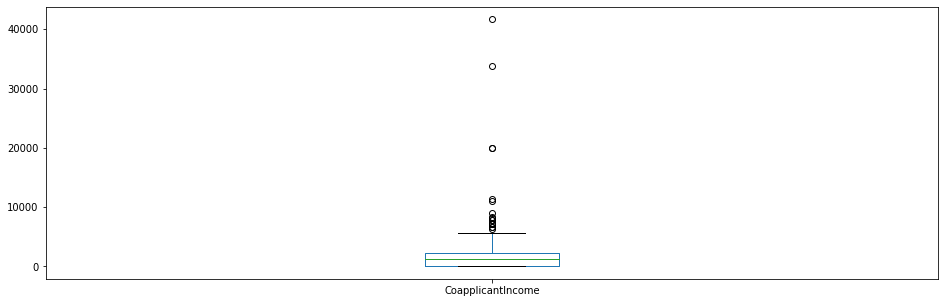

In [21]:
train['CoapplicantIncome'].plot.box(figsize=(16,5))

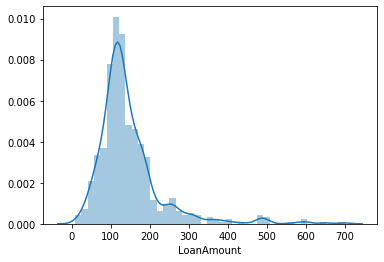

In [22]:
sns.distplot(train['LoanAmount'])

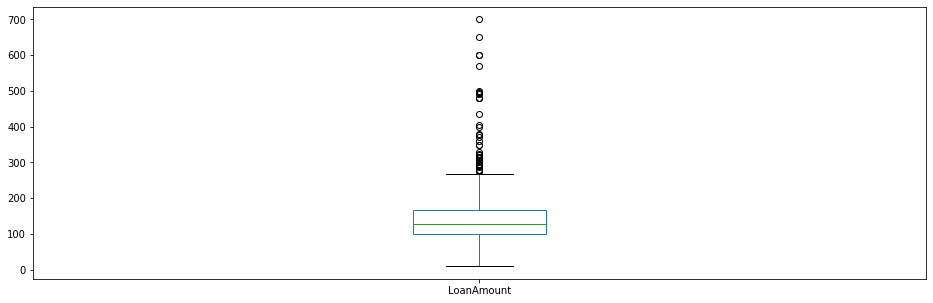

In [23]:
train['LoanAmount'].plot.box(figsize=(16,5))

А тут уже анализ при использовании двух переменных. Bivariate analysis.

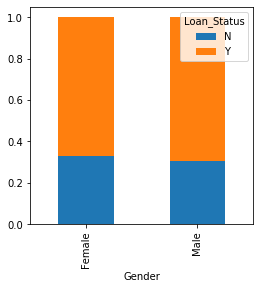

In [24]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

In [25]:
Married=pd.crosstab(train['Married'],train['Loan_Status']) 
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
Education=pd.crosstab(train['Education'],train['Loan_Status']) 
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])

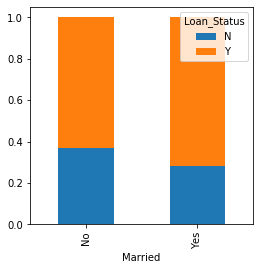

In [26]:
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

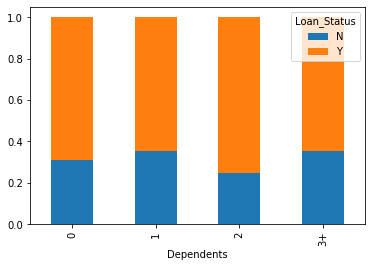

In [27]:
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

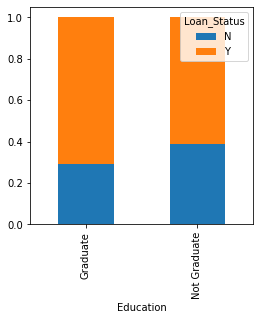

In [28]:
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

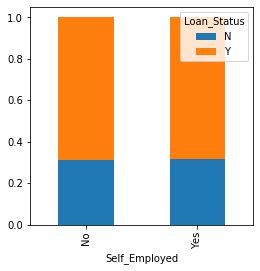

In [29]:
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

In [30]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status']) 
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 

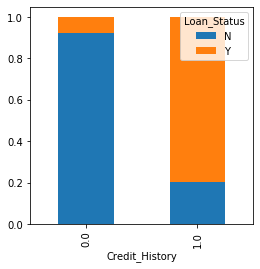

In [31]:
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 

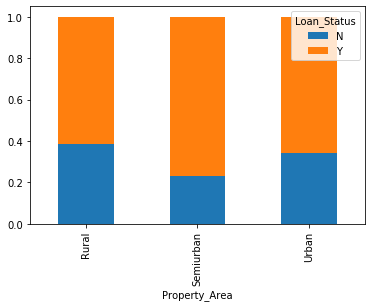

In [32]:
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

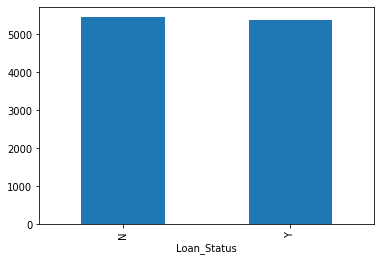

In [33]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

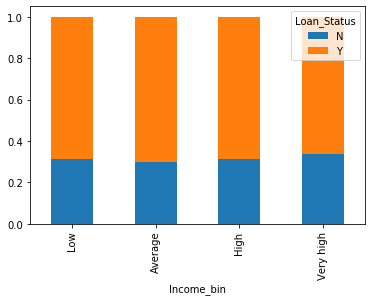

In [34]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 

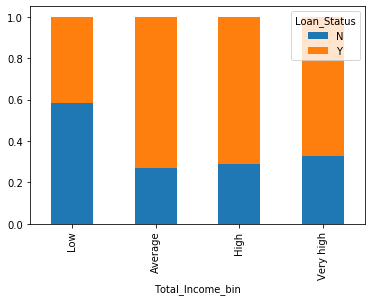

In [35]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

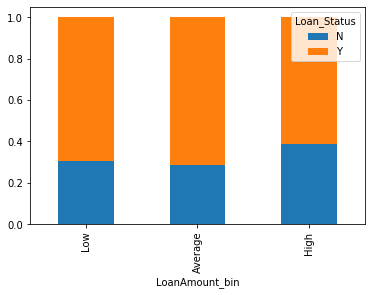

In [36]:
bins=[0,100,200,700] 
group=['Low','Average','High'] 
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

In [37]:
from scipy import stats

тут избавляемся от энок.

In [38]:
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)

In [39]:
train[:5]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Total_Income,Total_Income_bin,LoanAmount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,High,5849.0,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,6091.0,Very high,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,3000.0,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,4941.0,High,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,6000.0,High,Average


тут избавляемся от outlier'ов с помощью логарифма. Он не сильно затрагивает малые числа, но хорошо справляется с большими.

In [40]:
train['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [41]:
train['LoanAmount'] = np.log(train['LoanAmount'])

In [42]:
train['Dependents'].replace('3+', 3,inplace=True)
train['Dependents'].replace('2', 2,inplace=True)
train['Dependents'].replace('1', 1,inplace=True)
train['Dependents'].replace('0', 0,inplace=True)

In [55]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train.Self_Employed = encoder.fit_transform(train['Self_Employed'])
train.Education = encoder.fit_transform(train['Education'])
train.Loan_Status = encoder.fit_transform(train['Loan_Status'])
train.Gender = encoder.fit_transform(train['Gender'])
train.Married = encoder.fit_transform(train['Married'])
train.Loan_Status = encoder.fit_transform(train['Loan_Status'])
train_cat_prop = train['Property_Area']
train_cat_prop2 = train['Dependents']
train_cat_prop_enc = encoder.fit_transform(train_cat_prop)
train_cat_prop_enc2 = encoder.fit_transform(train_cat_prop2)

In [56]:
encoder.classes_

array([0, 1, 2, 3], dtype=int64)

In [45]:
from sklearn.preprocessing import OneHotEncoder
encoderer = OneHotEncoder()
train_cat_1hot = encoderer.fit_transform(train_cat_prop_enc.reshape(-1,1))
train_cat_1hot2 = encoderer.fit_transform(train_cat_prop_enc2.reshape(-1,1))

In [46]:
train.iloc[:,[11]]

,Property_Area
0,Urban
1,Rural
2,Urban
3,Urban
4,Urban
...,...
609,Rural
610,Rural
611,Urban
612,Urban


In [47]:
train_cat_1hot = train_cat_1hot.toarray()
train_cat_1hot2 = train_cat_1hot2.toarray()

In [48]:
train_cat_1hot.shape

(614, 3)

избавляемся от ненужных столбцов.

In [72]:
train = train.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome','Property_Area','Income_bin','Total_Income_bin','LoanAmount_bin','Dependents'],axis=1)

KeyError: "['Loan_ID' 'ApplicantIncome' 'CoapplicantIncome' 'Property_Area'\n 'Income_bin' 'Total_Income_bin' 'LoanAmount_bin'] not found in axis"

In [70]:
train[:5]

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income
0,1,0,0,0,0,4.852030,360.0,1.0,1,5849.0
1,1,1,1,0,0,4.852030,360.0,1.0,0,6091.0
2,1,1,0,0,1,4.189655,360.0,1.0,1,3000.0
3,1,1,0,1,0,4.787492,360.0,1.0,1,4941.0
4,1,0,0,0,0,4.948760,360.0,1.0,1,6000.0


Забыл избавиться от Dependents. Неохота чистить код. Просто вставлю тут.

In [73]:
train = train.drop(['Dependents'],axis=1)

In [74]:
X = train.drop(['Loan_Status'],axis=1)
y = train.Loan_Status
X = X.values
X = np.concatenate((X, train_cat_1hot,train_cat_1hot2),axis=1)
y = y.values
X.shape

(614, 15)

Проверяем тип данных переменных во избежание ошибок

In [75]:
X.dtype

dtype('float64')

проверяем, остались ли Nan, потому как в строчке ниже выдало ошибку.
Выяснилось, что я забыл оцифровать таргет переменную.
Забыл, что не исправил индексы переменных, после изменения программы.

In [76]:
y.dtype

dtype('int64')

In [78]:
y=y.astype('float64')

мутим модель

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
clf = LogisticRegression(random_state=0,max_iter = 2000)
kfl = StratifiedKFold(n_splits = 10, random_state = 1, shuffle = True)
result = cross_val_score(clf,X,y,cv=kfl,scoring = 'accuracy')
print(f'Mean = {result.mean()}, std = {result.std()}')

Mean = 0.7882072977260709, std = 0.056540062256819984


Можно улучшить результат, но мне лень. Лучше перейду на другой проект и попытаюсь сделать его уже без туториала. Пришлось повысить количество итераций вдвое, это наверняка костыль. Надо было как то оптимизировать систему. Но опять же, нет никакого желания.